In [74]:
##   特定の周波数(音の高さ)を強調するプログラム
##     copy right 2018 A.Tada (rinakia.3kkc@gmail.com)


# Input
wavfile = "Good Morning.wav"  # 対応はまだwavのみ...
f_low   = 10    # 強調したい周波数帯域(下限) 
f_high  = 800   # 強調したい周波数帯域(上限)
f_ratio = 1   # 強調の強さ(割合)

In [77]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import scipy.io.wavfile as audio
# import scikits.audiolab の方が機能多いっぽい..

Sampling rate : 44100


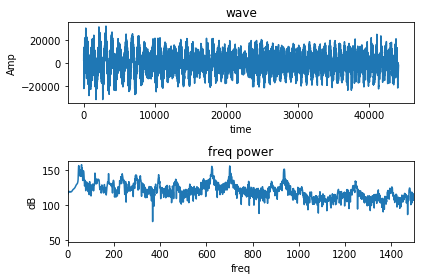

In [69]:
# wav読み込み
fs, data = audio.read(wavfile)
print("Sampling rate :", fs)  # サンプリング周波数 44100 or 48000
if (data.shape[1] == 2):
    left = data[:, 0] # numpy arrayらしい。。
    right = data[:, 1]
# x = np.arange(fs)
# plt.plot(x,left[fs:fs*2])
# x_f = np.fft.fft(left[fs:fs*2])
# plt.plot(x,abs(x_f))
# print(x_t)
plt.subplot(2, 1, 1)
plt.plot(np.arange(fs),left[fs:fs*2]) # plot
plt.title("wave")
plt.xlabel("time")
plt.ylabel("Amp")
plt.subplot(2, 1, 2) # classにした方が楽??
left_f = np.fft.fft(left[fs:fs*2])
plt.plot(np.arange(fs),20*np.log10(abs(left_f))) # plot
plt.title("freq power")
plt.xlabel("freq")
plt.ylabel("dB")
plt.xlim(0, 1500)
plt.tight_layout()

(44100,)


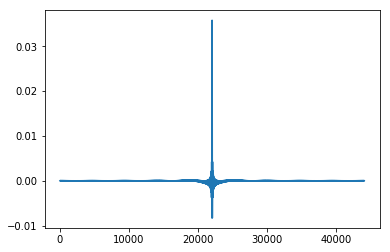

In [70]:
# 周波数帯域フィルタ
flter_f=np.zeros(fs,dtype = complex)
flter_f[f_low:f_high]=1+0j
flter_f[int(fs/2)+1:fs]=np.conj(flter_f[int(fs/2)-1:0:-1])
flter_t1 = np.fft.ifft(flter_f)
flter_t1 = flter_t1.real
# flter_t1 = np.insert(flter_t1[int(fs/2):fs],fs,flter_t1)
flter_t = np.array([])
flter_t = np.insert(flter_t1[int(fs/2):fs],0,flter_t)
flter_t = np.insert(flter_t1[0:int(fs/2)],0,flter_t)
# flter_t = np.array([flter_t1[int(fs/2):fs],flter_t1[0:int(fs/2)]])
x = np.arange(fs)
plt.plot(x,flter_t)
print(flter_t.shape)

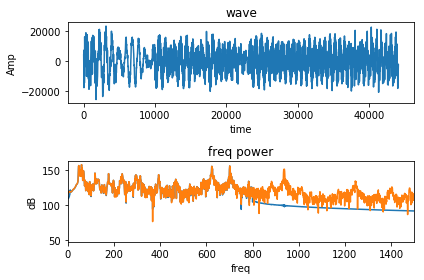

In [30]:
# 畳み込んで特定の周波数取り出せているか確認
# sample conv
sample_conv = np.convolve(left[fs:fs*2], flter_t)
plt.subplot(2, 1, 1)
plt.plot(x,sample_conv[int(fs/2):int(fs*3/2)])
plt.title("wave")
plt.xlabel("time")
plt.ylabel("Amp")
plt.subplot(2, 1, 2) # classにした方が楽??
sample_conv_f = np.fft.fft(sample_conv[int(fs/2):int(fs*3/2)])
plt.plot(np.arange(fs),20*np.log10(abs(sample_conv_f))) # plot
plt.plot(np.arange(fs),20*np.log10(abs(left_f))) # オレンジ 取り出す前の周波数power
plt.title("freq power")
plt.xlabel("freq")
plt.ylabel("dB")
plt.xlim(0, 1500)
plt.tight_layout()

In [75]:
# 
# left_conv  = np.convolve(left, flter_t)
# right_conv = np.convolve(right, flter_t)
left_band  = left_conv[int(fs/2):len(left_conv)-int(fs/2)+1]
right_band  = right_conv[int(fs/2):len(right_conv)-int(fs/2)+1]
left_mix = left + left_band*f_ratio
right_mix = right + right_band*f_ratio
# if文より速い?
max_mix=np.zeros(2)
max_mix[0]=np.amax(abs(left_mix))
max_mix[1]=np.amax(abs(right_mix))
max_mix = np.amax(max_mix)
max_in = np.zeros(2)
max_in[0]=np.amax(abs(left))
max_in[1]=np.amax(abs(right))
max_in = np.amax(max_in)
# 
left_mix = left_mix / max_mix * max_in
right_mix = right_mix / max_mix * max_in

"""
left_mix_f = np.fft.fft(left_mix[int(fs/2):int(fs*3/2)])
plt.plot(np.arange(fs),20*np.log10(abs(left_mix_f))) # plot
plt.plot(np.arange(fs),20*np.log10(abs(left_f))) # オレンジ 取り出す前の周波数power
plt.title("freq power")
plt.xlabel("freq")
plt.ylabel("dB")
plt.xlim(0, 1500)
"""
buf = np.zeros((len(left_mix),2),dtype='int') 
buf[:,0] = left_mix
buf[:,1] = right_mix

# scipy.io.wavfile.write(filename, rate, data)
audio.write("edit180620_"+wavfile,fs,buf)